# Images and Colors

The purpose of this assignment is to get some practice analyzing color distributions of images.

To do this, you will need to grab 3 images from the web using `wget` -- see the Lab for this week for a walk through for how to do this.

### Reminder prompt (see main prompt for more details)
Pick 3 of your own images from the web (you can use your own photos as long as they are on the web with a public URL) and create a visualization that shows how similar/different these images are using these histogramming methods.

You are free to choose 3 images that look "similar" to you or very different and describe how mapping them into color space (i.e. showing their color distribution) either confirms or negates these differences or similarities.  (For example, let's say you choose a painting of a beach and a photo of a beach their color spaces might look very different although they are representations of similar objects). You may also want to choose a set of images that you like and those you don't like to see if there are any differences due to color choices.

Fill in your code in the cells below and hit "Save & Grade" on the main prompt when you are finished -- the instructional team will then grade your assignment.

In [18]:
# 3 images from the web
!wget https://as1.ftcdn.net/v2/jpg/02/43/25/90/1000_F_243259090_crbVsAqKF3PC2jk2eKiUwZHBPH8Q6y9Y.jpg -O beach.jpg
!wget https://www.metroparks.net/wp-content/uploads/2017/06/1080p_HBK_autumn-morning_GI.jpg -O forest.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/4/47/New_york_times_square-terabass.jpg -O city.jpg

zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget


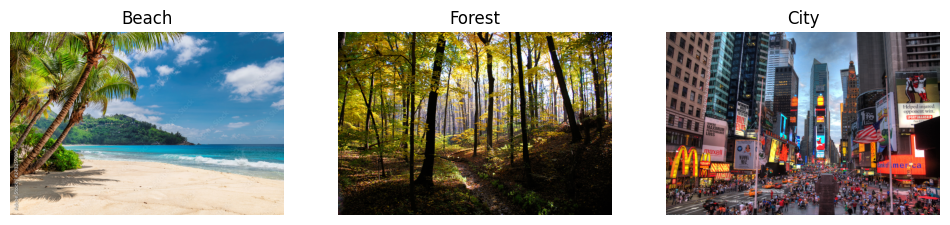

In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

beach = np.array(Image.open('beach.jpg'))
forest = np.array(Image.open('forest.jpg'))
city = np.array(Image.open('city.jpg'))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(beach); axes[0].set_title("Beach"); axes[0].axis("off")
axes[1].imshow(forest); axes[1].set_title("Forest"); axes[1].axis("off")
axes[2].imshow(city); axes[2].set_title("City"); axes[2].axis("off")
plt.show()

Image #1 – Beach: The beach photo has pale sand, teal water, and bright sky. Overall, the picture feels light with a darker spots in the water and shadows.

Image #2 – Forest: The forest scene is filled with shadows, tree trunks, and leaves. Overall, the picture looks dark with small bright flecks of light.

Image #3 – City: The Times Square city photo has billboards, neon signs, and evening sky. It mixes bright saturated lights with middle tone buildings and some darker areas.

In [20]:
def plot_color_hist(img, title):
    colors = ("red", "green", "blue")
    plt.figure(figsize=(5,3))
    for i, col in enumerate(colors):
        plt.hist(img[:,:,i].ravel(), bins=256, color=col, alpha=0.5, label=col)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

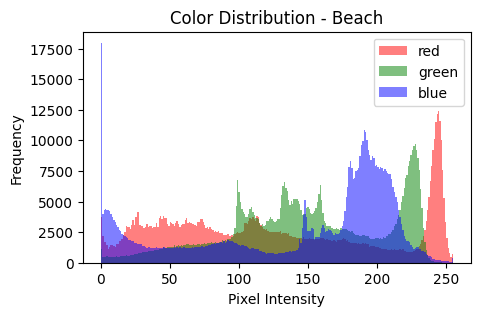

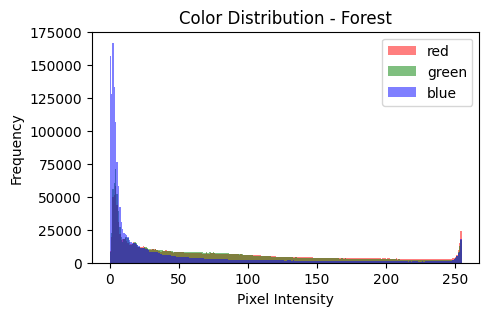

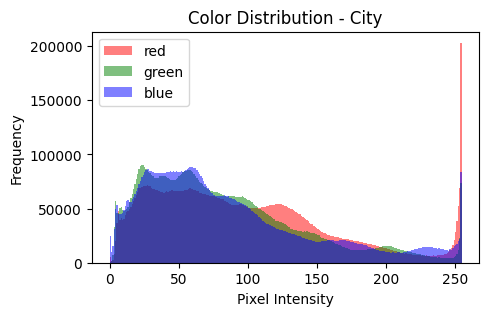

In [21]:
plot_color_hist(beach, "Color Distribution - Beach")
plot_color_hist(forest, "Color Distribution - Forest")
plot_color_hist(city, "Color Distribution - City")

Image #1 – Beach: Red shows a cluster at the high end around 250, which is consistent with the sunlit sand and the warm cast in the sky. Green has two peaks in the midtones ranging from 100 to 150 and over 200, which is from water and vegetation tint and another toward the highlights from the sky. Blue is strong from midtones to highlights, reflecting the water and sky.

The distributions confirm a light, cool palette with warm highlights. Broad green and blue ranges indicate smooth gradients in sky and water while the red at the top end captures the sunny highlights on sand and clouds. Overall, most pixels lie in the middle to high intensities.

Image #2 – Forest: All R, G, and B are concentrated near 0 to 50, with a long, thin tail through the midtones and a small spike near 255. Green slightly exceeds red/blue in the lower midtones, but the three channels combined with each other in the shadows.

The steep pile up at low intensities shows most pixels are dark, consistent with the heavy shade and contrasty trunks. The small spike reflects sunlit patches between trees. The green surplus in the midtones indicates the presence of vegetation.

Image #3 – City: Blue spans widely across midtones and highlights, which is common in the night scenes. Green shows a broad hump through the midtones. Red includes a high-intensity spike , consistent with the bright red signage and light sources.

The broad, overlapping middle to high tone distributions indicate a colorful, high contrasting scene with many saturated lights. The red highlight spike comes from neon and LED signs; blue’s long span fits the cool evening. Compared with the beach, there’s more saturation and more energy in both midtones and highlights.

Compare/Contrast

The beach image is high key: all three channels span from midtones into highlights with blue and green broadly distributed and red elevated at the top end. This yields a bright, airy palette with cool dominance.

The forest image is low key: all channels peak near 0–50, showing a dark distribution with limited saturation. A green lift in the low-mid range distinguishes leaves from trunks, but most pixels remain in shadows.

The city image shows high contrast and higher saturation: each channel spans a wide mid-to-high range and red has an additional highlight spike from neon lights. The overlap of the three channels in the region reveals multicolored illumination typical of night cityscapes.